<a href="https://colab.research.google.com/github/CiaraFarrellSETU/-SEM2---Data-Analytics-and-Algorithms/blob/main/support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ciara Farrell  
ID:C00294114


This notebook looks at support vector machines [SVM].  
A SVM is a from of supervised classification and it can be used to perform regression.  
SVM's are very good at binary classification which is when the points of a data set are classified into two groups.  

**Part A**  
To begin with one again Jake VanderPlas' simple SVM example will be exaimed, to this involves creating blobs and performing classification on these https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html.   
The start modules are imported to allow for the model to work.  
Scipy stats is used for perfoming statistical functions and probability distributions.  
The other models have been looked at before in other machine learning models.

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats

<ipython-input-10-dd216727775a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


By using sklearn it is possible to make blobs these blobs are then used to perform classification based on class.  
There is 120 blobs divided between two classes, so 60 blobs a class.  
The random state was kept to zero as changing it to different values like 1 for example shoved the classes into the digonal corners and left tons of white space between them.  
With random state kept to zero there is not much space between the classes.  
The cluster standard deviation was set to 0.7 as anything lower cause the points in each class to become closer to eachother and anything over 0.7 made the points begin to overlap with eachother.  
The blobs are plotted as size 20 and colour pallet rainbow each class is depicted as purple or red.   
In comparison the Jake's work I am creating more cluster points and increasing the standard deviation spread of the data.  
The random stae was kept to zero as any value from 1-3 completely seperated the clusters , a value of 4 split if 50:50 across the graph

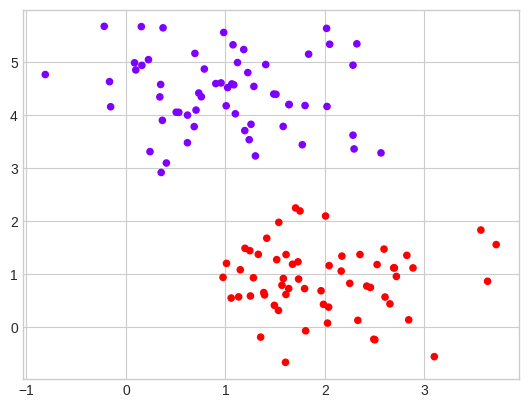

In [30]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=120, centers=2,
                  random_state=0, cluster_std=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='rainbow');

The next step is to draw a strigh line to divide the classes.  
But there is multplie options of which line to draw.  
I selected to plot 4 different variations.  
The m and b values where guessed and edited to creat a line tat divides the classes
A new point is plotted on the graph and denoted by the blue x.  
Depending on which line is picked the x point will eaither belong to the purple or red points class.


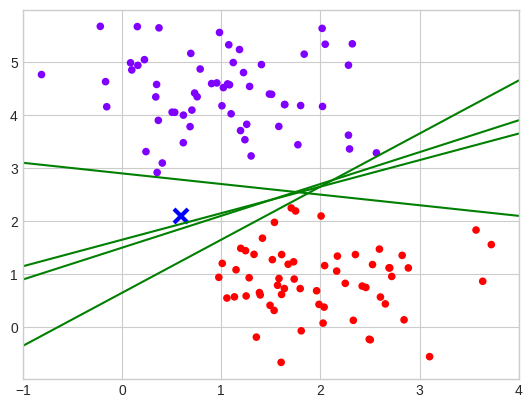

In [32]:
xfit = np.linspace(-1, 4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='rainbow')
plt.plot([0.6], [2.1], 'x', color='blue', markeredgewidth=3, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.65), (-0.2, 2.9),(0.6,1.5)]:
    plt.plot(xfit, m * xfit + b, 'g')

plt.xlim(-1, 4);

By using support vector machines instead of just drawing a straight line a margin is used.  
The line that is the best split is the one that maximizes the margin.  
The margin is seem as the light blue area that surronds the green line on either side.
The aplha value is adjusted to 0.2 to increase the transparency of the margin.

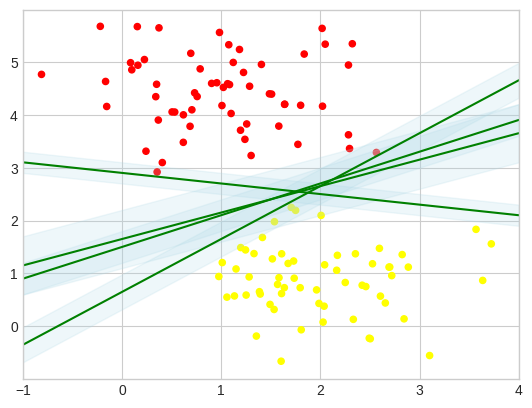

In [39]:

xfit = np.linspace(-1, 4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.65, 0.55), (-0.2, 2.9, 0.2),(0.6,1.5,0.3)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, 'g')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='black',
                     color='lightblue', alpha=0.2)

plt.xlim(-1, 4);

By using scikite-learns support vector classifer (SVC).  
C is the regularization paramater and its strenght is linearly proportional to C.  
The kernal is the kernal type used in the SVC examples of kernal inclued linear, poly and rbf.  
The SVC model of c = 1 and kernal type of linear is applie to the data.

In [40]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)


SVC(kernel='linear')

This code plots the SVM which was predefined above.  


In [41]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

The straight black line is the line that minimizes the margin between the classes.  
The point which touch the dashed line margin are circled to distinguish them from the other points which dont touch the margin.  
The circled points are known as the support vectors these points are used to position the hyperplane on the graph.

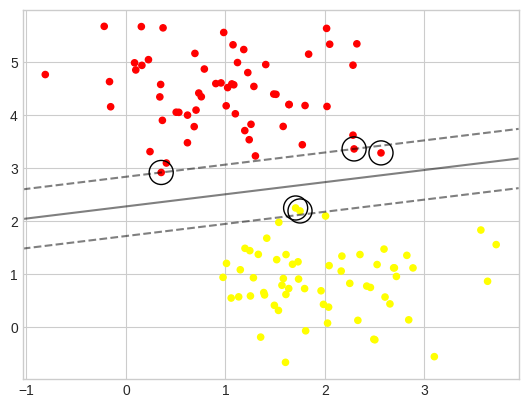

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='autumn')
plot_svc_decision_function(model);

Printing the coordinates of the support vectors  
There is five circled points near the line so there should be 5 outputs

In [17]:
model.support_vectors_

array([[0.35482006, 2.9172298 ],
       [2.29447557, 3.36035598],
       [2.56509832, 3.28573136],
       [1.75066004, 2.19214827],
       [1.70664481, 2.2483361 ]])

it is possible to plot the support vector machine model for 120 and 240 points.  
The plot on the left depicts the model with 120 points and the right plot shows the model for 460 points.  
Even when the number of points has tripled the found SVM model doesn't change.  
This shows that the SVM model found is the best for the data and is not effected by the number of data points avaible.


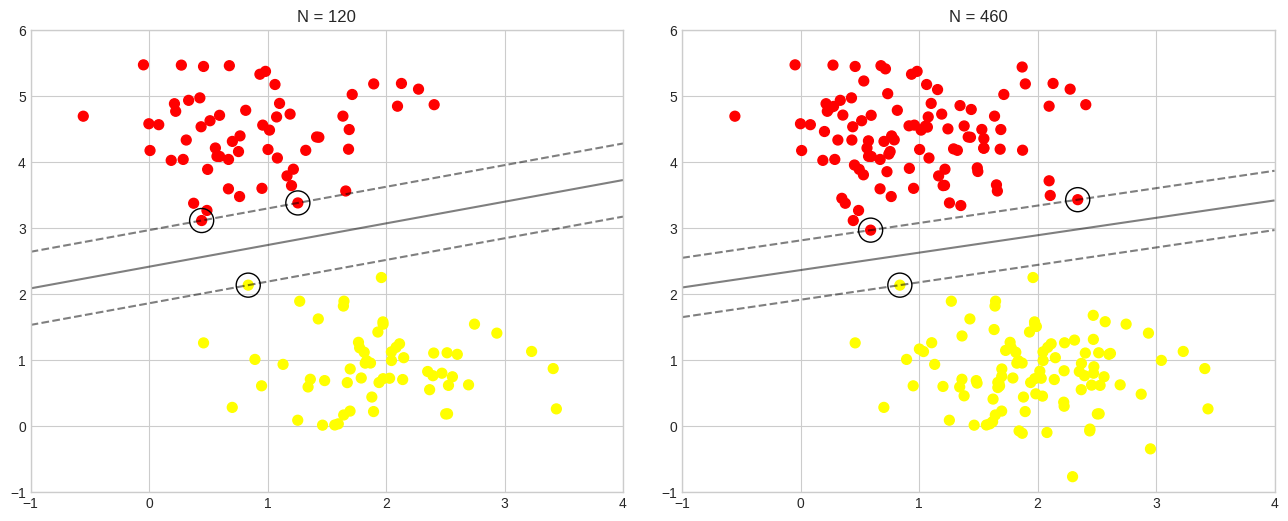

In [21]:

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0825, right=0.86, wspace=0.1)
for axi, N in zip(ax, [120, 460]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Part B**  
Now using a dataset found on githubSVM will be performed.  
The following examples have been used to help in the creation of this algorithm.  
https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Code/Day%2013%20SVM.md  
https://www.kaggle.com/code/prashant111/svm-classifier-tutorial

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset and looking at its first five values.  
The data contains 400 rows of information.

In [44]:
dataset = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Admission.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The y values is assigned to research as it has a two binary class of 1 or 0.  
The first 6 columns are assigned to x

In [45]:
X = dataset.iloc[:, [1, 6]].values
y = dataset.iloc[:, 7].values

Now the data needs to be split into training and testing data.
The test size is 20% of the data and the training size contains the remaining 80%.  
The reason why this split was chosen is becasue a higher split will decrease the models accuracy.  
 it allows for a good ammount of data in the test set and it produces confusion matrix with low false positives and flase negatives.  
 When random state is set to 0 the models accuracy is 0.77, but when the random sate is increase to 2 the models accuracy increases to 0.81, futher increasing to 3 brings accuracy to 0.85.  
 ANy random stae higher than this reduces the accuracy.

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)


Next feature scaling is preformed by using sklearn.preprocessing import StandardScaler.  
Standard scaler standerdizes the data by removing the mean and scaling to varance of a unit.  
Standardization is then perfomed to the x train and x test data.  
It normalised the values from a range of 0 to 1.

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

The SVM is fitted to the training set by using scikite-learns support vector classifer (SVC).  
The random state is set to zero to avoid the data being shuffled about.  
A linear kernal is fitted to the model

In [91]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

It is possoble to predict the test data set reults by using classifier.predict .  


In [92]:
y_pred = classifier.predict(X_test)

In [93]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.85

The computed prediction can be used with the y_test values to create a confusion matrix.  
The matrix shows the number of true poisitives are 11 and true negatives are 17.  
The model only make 2 incorrect predictions.

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[29,  2],
       [10, 39]])

Plotting the training results

<ipython-input-95-9beeeb70434d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


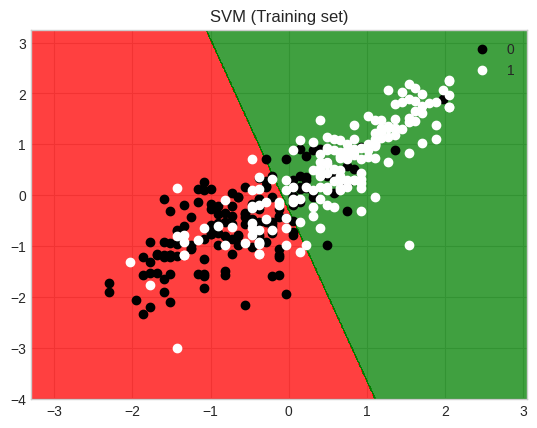

In [95]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('Black', 'white'))(i), label = j)
plt.title('SVM (Training set)')
plt.legend()
plt.show()

Plotting the test set

<ipython-input-96-e6d620049b93>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


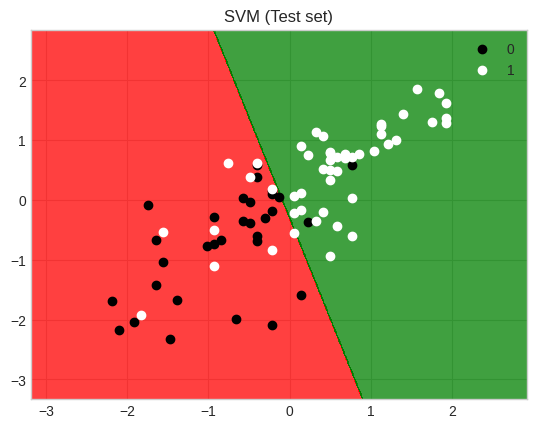

In [96]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('SVM (Test set)')
plt.legend()
plt.show()

By import metrics is is possible to compute accuracy of the models training sets.  
By firstly using the default parameters on the model the accuracy score is found to be 0.81

In [97]:
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.81


Now using the linear kernel to compute model accuracy.  
It has a value of 0.85

In [98]:
linear_svc=SVC(kernel='linear')
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)

print('Model accuracy score with linear kernel: {0:0.2f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel: 0.85


In [99]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.7656
Test set score: 0.8500


Now using the poly kernel to compute model accuracy.  
It has a value of 0.75 which is lower than the linear kernel

In [100]:
poly_svc=SVC(kernel='poly')
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Model accuracy score with polynomial kernel : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel : 0.75


Now using the sigmoid kernel to compute model accuracy.  
It has a value of 0.70 which is the lowest model accuracy score

In [101]:

sigmoid_svc=SVC(kernel='sigmoid' )
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)
print('Model accuracy score with sigmoid kernel : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel : 0.70


After using 4 different kernel types the following accuracy score where obtained.  
Default which as aslo known as rbf:0.81  
Linear: 0.85  
Poly: 0.75  
Sigmoid: 0.70  
linear was found to be the best kernal fit as it gave the highest accuracy result.  
Printing the classifaction report and confusion matrix for the linear kernal.  
The confusion matrix has also imporved using this kernal as now the number of true negatives had increased and the number of false negatives have decreased.

In [102]:
linear_svc=SVC(kernel='linear')
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)


In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        31
           1       0.95      0.80      0.87        49

    accuracy                           0.85        80
   macro avg       0.85      0.87      0.85        80
weighted avg       0.87      0.85      0.85        80



array([[19, 12],
       [12, 37]])